**Small Dataset**

In [1]:
!git clone https://github.com/coick4698/garbage_classification.git

Cloning into 'garbage_classification'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 159 (delta 73), reused 44 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (159/159), 2.21 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/garbage_classification

import sys
sys.path.append('/content/garbage_classification/src')

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from dataset import get_dataloaders
from model import get_mobilenetv2, get_densenet121, get_squeezenet, get_shufflenetv2
from train import train_model
from utils import plot_accuracy, plot_confusion_matrix, eval_precision_recall_f1

data_path = '/content/drive/MyDrive/iss_project/garbage_classification'

Mounted at /content/drive
/content/garbage_classification


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 160MB/s]


Epoch [1/10] Train Acc: 64.39%, Val Acc: 42.36%
Epoch [2/10] Train Acc: 76.85%, Val Acc: 70.43%
Epoch [3/10] Train Acc: 86.73%, Val Acc: 76.69%
Epoch [4/10] Train Acc: 89.80%, Val Acc: 74.44%
Epoch [5/10] Train Acc: 90.30%, Val Acc: 73.93%
Epoch [6/10] Train Acc: 91.43%, Val Acc: 70.18%
Epoch [7/10] Train Acc: 89.86%, Val Acc: 78.95%
Epoch [8/10] Train Acc: 93.18%, Val Acc: 76.94%
Epoch [9/10] Train Acc: 95.56%, Val Acc: 73.93%
Epoch [10/10] Train Acc: 95.12%, Val Acc: 75.44%


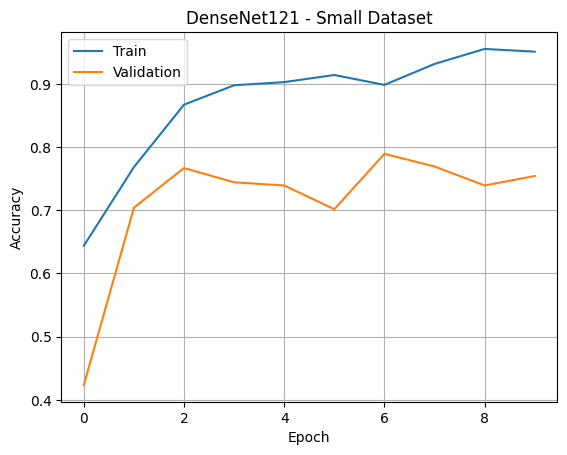

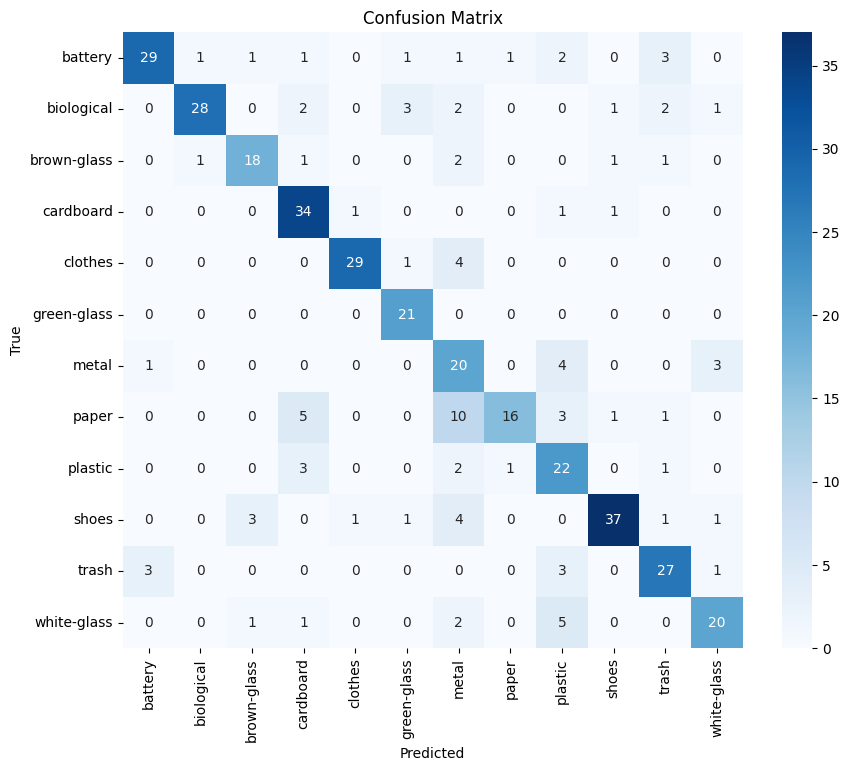

Classification Report:
              precision    recall  f1-score   support

     battery     0.8788    0.7250    0.7945        40
  biological     0.9333    0.7179    0.8116        39
 brown-glass     0.7826    0.7500    0.7660        24
   cardboard     0.7234    0.9189    0.8095        37
     clothes     0.9355    0.8529    0.8923        34
 green-glass     0.7778    1.0000    0.8750        21
       metal     0.4255    0.7143    0.5333        28
       paper     0.8889    0.4444    0.5926        36
     plastic     0.5500    0.7586    0.6377        29
       shoes     0.9024    0.7708    0.8315        48
       trash     0.7500    0.7941    0.7714        34
 white-glass     0.7692    0.6897    0.7273        29

    accuracy                         0.7544       399
   macro avg     0.7765    0.7614    0.7536       399
weighted avg     0.7926    0.7544    0.7581       399

Accuracy: 0.7544


RuntimeError: Parent directory results/checkpoints does not exist.

In [3]:
# DenseNet121 - Small dataset (12m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_densenet121(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="DenseNet121 - Small Dataset")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/densenet121_small_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 115MB/s] 


Epoch [1/10] Train Acc: 67.15%, Val Acc: 73.18%
Epoch [2/10] Train Acc: 80.98%, Val Acc: 82.21%
Epoch [3/10] Train Acc: 87.05%, Val Acc: 79.45%
Epoch [4/10] Train Acc: 87.42%, Val Acc: 76.19%
Epoch [5/10] Train Acc: 89.17%, Val Acc: 78.70%
Epoch [6/10] Train Acc: 91.55%, Val Acc: 78.45%
Epoch [7/10] Train Acc: 93.80%, Val Acc: 81.45%
Epoch [8/10] Train Acc: 94.24%, Val Acc: 77.69%
Epoch [9/10] Train Acc: 95.12%, Val Acc: 80.20%
Epoch [10/10] Train Acc: 94.87%, Val Acc: 76.19%


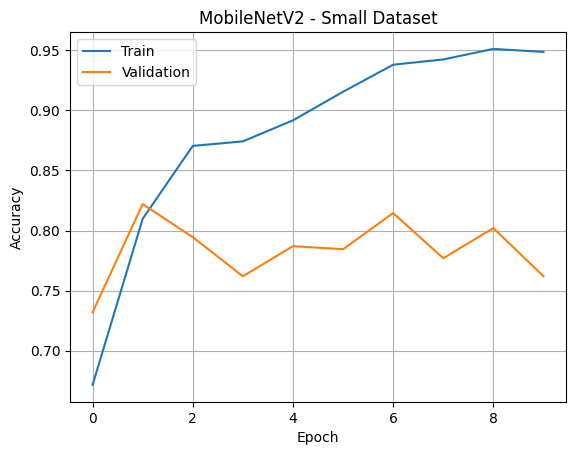

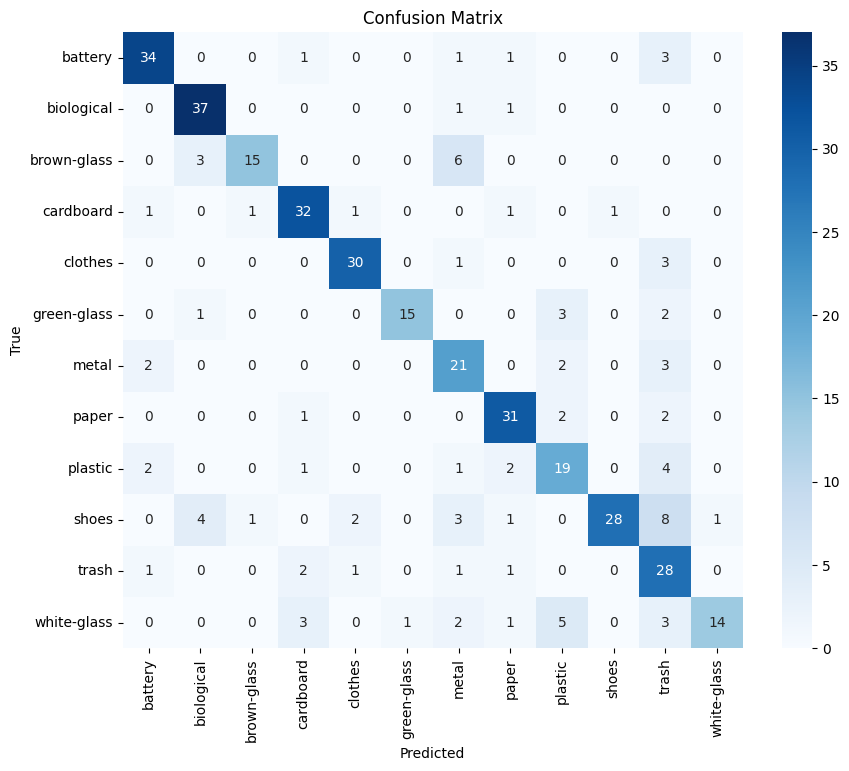

Classification Report:
              precision    recall  f1-score   support

     battery     0.8500    0.8500    0.8500        40
  biological     0.8222    0.9487    0.8810        39
 brown-glass     0.8824    0.6250    0.7317        24
   cardboard     0.8000    0.8649    0.8312        37
     clothes     0.8824    0.8824    0.8824        34
 green-glass     0.9375    0.7143    0.8108        21
       metal     0.5676    0.7500    0.6462        28
       paper     0.7949    0.8611    0.8267        36
     plastic     0.6129    0.6552    0.6333        29
       shoes     0.9655    0.5833    0.7273        48
       trash     0.5000    0.8235    0.6222        34
 white-glass     0.9333    0.4828    0.6364        29

    accuracy                         0.7619       399
   macro avg     0.7957    0.7534    0.7566       399
weighted avg     0.8001    0.7619    0.7630       399

Accuracy: 0.7619


RuntimeError: Parent directory results/checkpoints does not exist.

In [4]:
# MobilenetV2 - Small dataset (2m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_mobilenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="MobileNetV2 - Small Dataset")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/mobilenetv2_small_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 51.1MB/s]


Epoch [1/10] Train Acc: 10.83%, Val Acc: 15.79%
Epoch [2/10] Train Acc: 18.59%, Val Acc: 24.06%
Epoch [3/10] Train Acc: 25.16%, Val Acc: 32.58%
Epoch [4/10] Train Acc: 30.41%, Val Acc: 33.08%
Epoch [5/10] Train Acc: 35.54%, Val Acc: 32.83%
Epoch [6/10] Train Acc: 40.18%, Val Acc: 45.36%
Epoch [7/10] Train Acc: 43.24%, Val Acc: 47.62%
Epoch [8/10] Train Acc: 45.06%, Val Acc: 48.87%
Epoch [9/10] Train Acc: 48.87%, Val Acc: 45.61%
Epoch [10/10] Train Acc: 46.81%, Val Acc: 44.36%


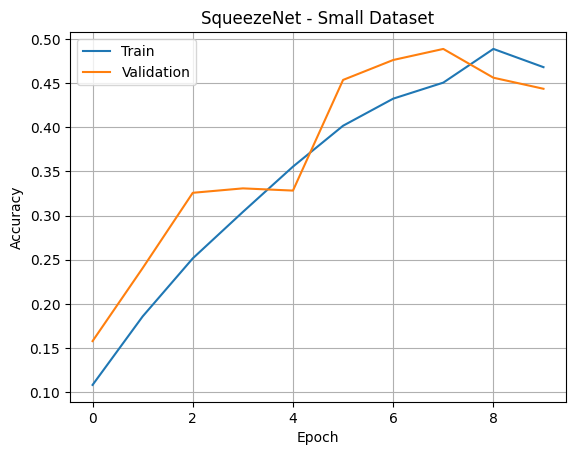

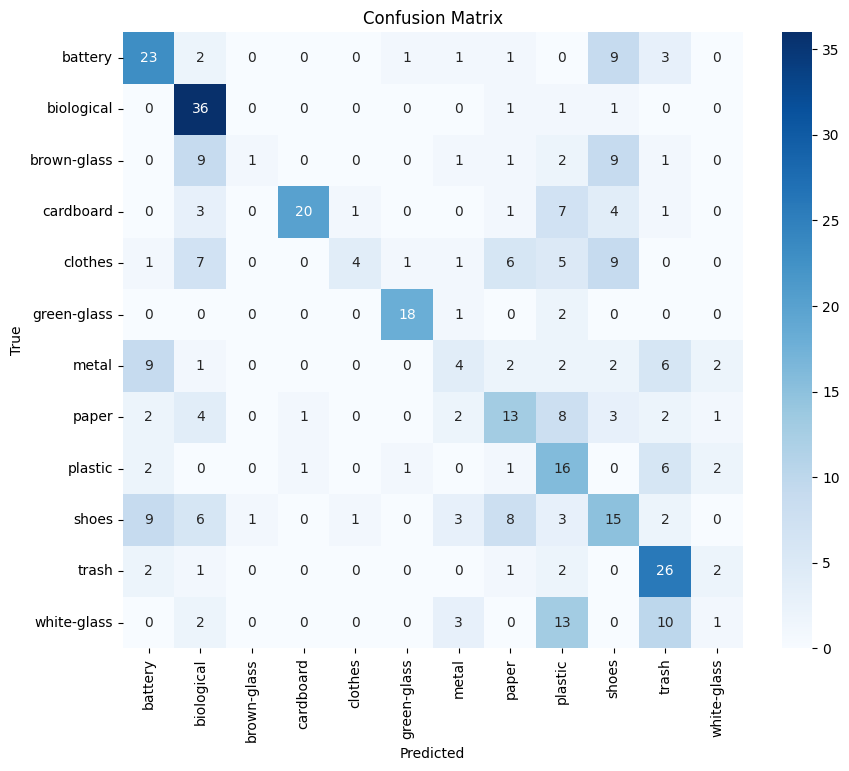

Classification Report:
              precision    recall  f1-score   support

     battery     0.4792    0.5750    0.5227        40
  biological     0.5070    0.9231    0.6545        39
 brown-glass     0.5000    0.0417    0.0769        24
   cardboard     0.9091    0.5405    0.6780        37
     clothes     0.6667    0.1176    0.2000        34
 green-glass     0.8571    0.8571    0.8571        21
       metal     0.2500    0.1429    0.1818        28
       paper     0.3714    0.3611    0.3662        36
     plastic     0.2623    0.5517    0.3556        29
       shoes     0.2885    0.3125    0.3000        48
       trash     0.4561    0.7647    0.5714        34
 white-glass     0.1250    0.0345    0.0541        29

    accuracy                         0.4436       399
   macro avg     0.4727    0.4352    0.4015       399
weighted avg     0.4667    0.4436    0.4064       399

Accuracy: 0.4436


RuntimeError: Parent directory results/checkpoints does not exist.

In [5]:
# Squeezenet - Small dataset(2m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_squeezenet(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="SqueezeNet - Small Dataset")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/squeezenet_small_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 87.4MB/s]


Epoch [1/10] Train Acc: 61.39%, Val Acc: 70.43%
Epoch [2/10] Train Acc: 77.85%, Val Acc: 76.69%
Epoch [3/10] Train Acc: 88.42%, Val Acc: 82.46%
Epoch [4/10] Train Acc: 92.87%, Val Acc: 84.71%
Epoch [5/10] Train Acc: 94.99%, Val Acc: 84.21%
Epoch [6/10] Train Acc: 96.43%, Val Acc: 86.22%
Epoch [7/10] Train Acc: 96.81%, Val Acc: 85.71%
Epoch [8/10] Train Acc: 97.31%, Val Acc: 87.47%
Epoch [9/10] Train Acc: 97.06%, Val Acc: 85.71%
Epoch [10/10] Train Acc: 98.50%, Val Acc: 86.47%


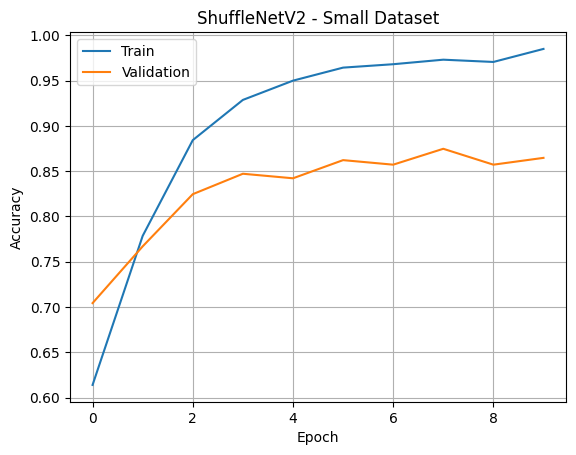

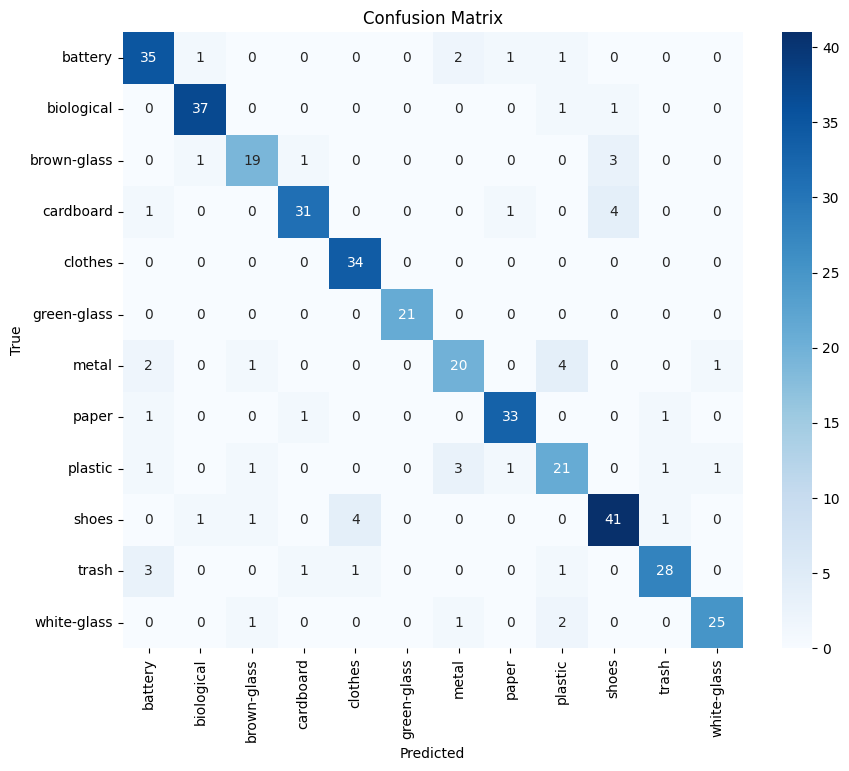

Classification Report:
              precision    recall  f1-score   support

     battery     0.8140    0.8750    0.8434        40
  biological     0.9250    0.9487    0.9367        39
 brown-glass     0.8261    0.7917    0.8085        24
   cardboard     0.9118    0.8378    0.8732        37
     clothes     0.8718    1.0000    0.9315        34
 green-glass     1.0000    1.0000    1.0000        21
       metal     0.7692    0.7143    0.7407        28
       paper     0.9167    0.9167    0.9167        36
     plastic     0.7000    0.7241    0.7119        29
       shoes     0.8367    0.8542    0.8454        48
       trash     0.9032    0.8235    0.8615        34
 white-glass     0.9259    0.8621    0.8929        29

    accuracy                         0.8647       399
   macro avg     0.8667    0.8623    0.8635       399
weighted avg     0.8657    0.8647    0.8642       399

Accuracy: 0.8647


RuntimeError: Parent directory results/checkpoints does not exist.

In [6]:
# ShufflenetV2 - Small dataset (1m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)

model = get_shufflenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="ShuffleNetV2 - Small Dataset")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/shufflenetv2_small_epoch10.pth")

Epoch [1/10] Train Acc: 61.83%, Val Acc: 70.68%
Epoch [2/10] Train Acc: 78.72%, Val Acc: 70.68%
Epoch [3/10] Train Acc: 81.91%, Val Acc: 78.95%
Epoch [4/10] Train Acc: 86.86%, Val Acc: 78.45%
Epoch [5/10] Train Acc: 85.54%, Val Acc: 79.45%
Epoch [6/10] Train Acc: 90.93%, Val Acc: 70.68%
Epoch [7/10] Train Acc: 85.86%, Val Acc: 78.20%
Epoch [8/10] Train Acc: 91.99%, Val Acc: 76.44%
Epoch [9/10] Train Acc: 91.49%, Val Acc: 82.21%
Epoch [10/10] Train Acc: 92.43%, Val Acc: 81.95%


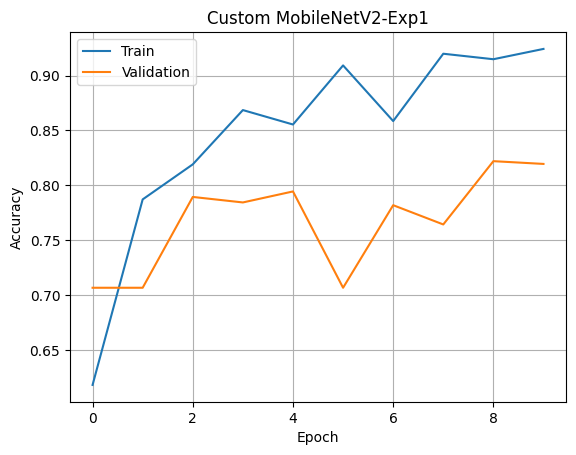

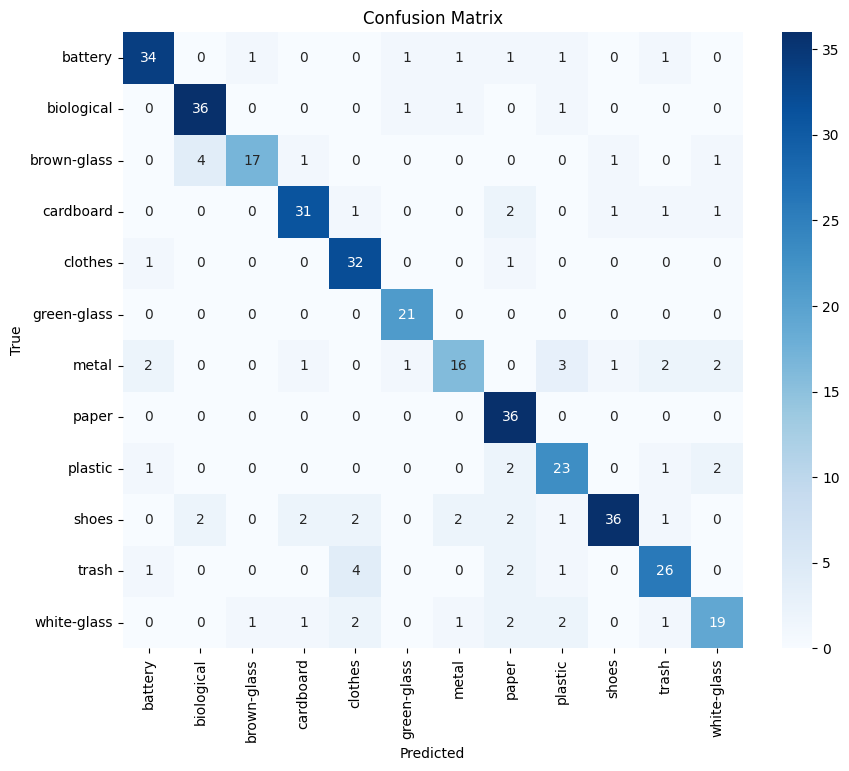

Classification Report:
              precision    recall  f1-score   support

     battery     0.8718    0.8500    0.8608        40
  biological     0.8571    0.9231    0.8889        39
 brown-glass     0.8947    0.7083    0.7907        24
   cardboard     0.8611    0.8378    0.8493        37
     clothes     0.7805    0.9412    0.8533        34
 green-glass     0.8750    1.0000    0.9333        21
       metal     0.7619    0.5714    0.6531        28
       paper     0.7500    1.0000    0.8571        36
     plastic     0.7188    0.7931    0.7541        29
       shoes     0.9231    0.7500    0.8276        48
       trash     0.7879    0.7647    0.7761        34
 white-glass     0.7600    0.6552    0.7037        29

    accuracy                         0.8195       399
   macro avg     0.8202    0.8162    0.8123       399
weighted avg     0.8242    0.8195    0.8161       399

Accuracy: 0.8195


RuntimeError: Parent directory results/checkpoints does not exist.

In [7]:
# Exp.1.5 - FC layer + Dropout + Activation Function -(2m)
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2
import matplotlib.pyplot as plt
import cv2
import os

# 1. Define model
class CustomMobileNetV2_exp1(nn.Module):
    def __init__(self, num_classes=12):
        super(CustomMobileNetV2_exp1, self).__init__()
        base_model = mobilenet_v2(weights='IMAGENET1K_V1')
        self.features = base_model.features
        self.pool = nn.AdaptiveAvgPool2d(1)

        # FC layer: 1280 -> 256 -> 12
        # Dropout(0.2,0.3)
        # Activation Function(ReLU6 -> GELU)
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, 256),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)

        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. load data
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 3. load model
model = CustomMobileNetV2_exp1(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

# 4. Accuracy Plot
plot_accuracy(train_acc, val_acc, title="Custom MobileNetV2-Exp1")

# 5. Confusion Matrix
plot_confusion_matrix(model, val_loader, class_names, device=device)

# 6. Precision / Recall / F1-score
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

# 7. Save
torch.save(model.state_dict(), "results/checkpoints/custommobilenetv2_exp1_small_epoch10.pth")

Epoch [1/10] Train Acc: 72.03%, Val Acc: 83.71%
Epoch [2/10] Train Acc: 88.36%, Val Acc: 84.71%
Epoch [3/10] Train Acc: 91.11%, Val Acc: 85.21%
Epoch [4/10] Train Acc: 94.31%, Val Acc: 86.97%
Epoch [5/10] Train Acc: 94.56%, Val Acc: 86.72%
Epoch [6/10] Train Acc: 93.93%, Val Acc: 86.97%
Epoch [7/10] Train Acc: 96.81%, Val Acc: 86.47%
Epoch [8/10] Train Acc: 96.93%, Val Acc: 87.47%
Epoch [9/10] Train Acc: 96.62%, Val Acc: 87.47%
Epoch [10/10] Train Acc: 95.81%, Val Acc: 86.97%


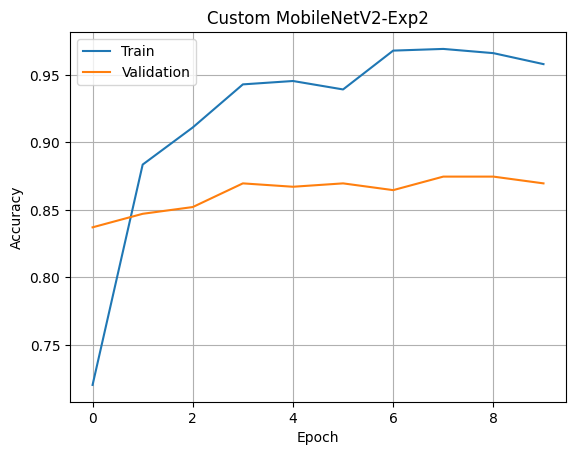

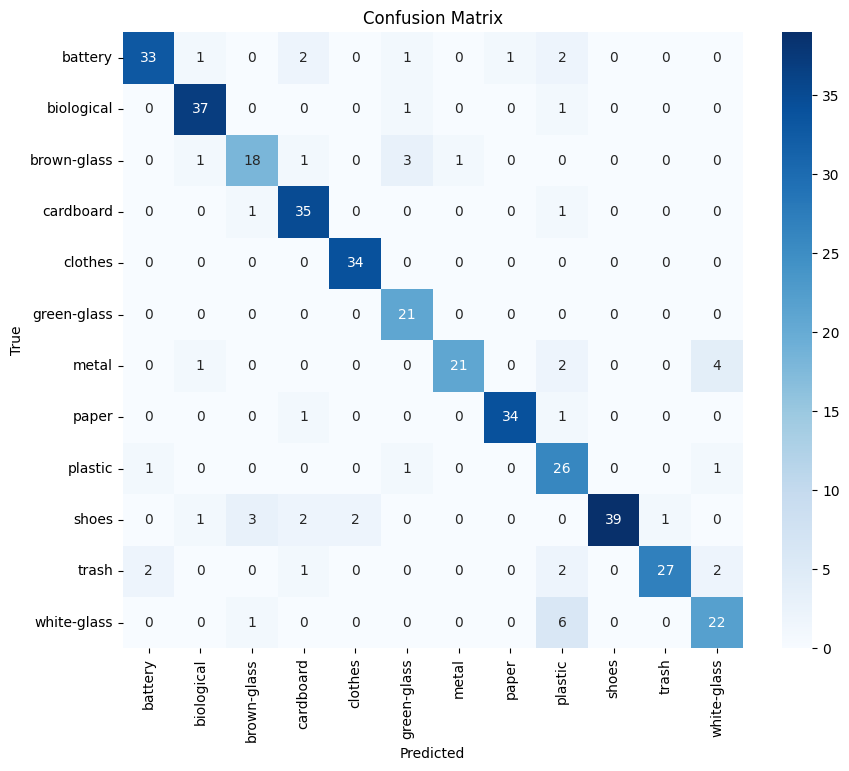

Classification Report:
              precision    recall  f1-score   support

     battery     0.9167    0.8250    0.8684        40
  biological     0.9024    0.9487    0.9250        39
 brown-glass     0.7826    0.7500    0.7660        24
   cardboard     0.8333    0.9459    0.8861        37
     clothes     0.9444    1.0000    0.9714        34
 green-glass     0.7778    1.0000    0.8750        21
       metal     0.9545    0.7500    0.8400        28
       paper     0.9714    0.9444    0.9577        36
     plastic     0.6341    0.8966    0.7429        29
       shoes     1.0000    0.8125    0.8966        48
       trash     0.9643    0.7941    0.8710        34
 white-glass     0.7586    0.7586    0.7586        29

    accuracy                         0.8697       399
   macro avg     0.8700    0.8688    0.8632       399
weighted avg     0.8842    0.8697    0.8711       399

Accuracy: 0.8697


RuntimeError: Parent directory results/checkpoints does not exist.

In [8]:
# Exp.2.5 - Transfer Learning Fine-tuning (partial) - Small dataset -(1m)

import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

# 1. Define model (pretrained + custom head)
class CustomMobileNetV2_exp2(nn.Module):
    def __init__(self, num_classes=12):
        super().__init__()
        base = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        self.features = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)

        # FC layer: 1280 -> 256 -> 12
        # Dropout(0.2,0.3)
        # Activation Function(ReLU6 -> GELU)
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, 256),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. utilize boundary of fine-tuning
def set_finetune_mode(model: CustomMobileNetV2_exp2, mode="partial", unfreeze_last_blocks=2):
    """
    mode: 'freeze' | 'partial' | 'full'
    - freeze  : Freeze the entire backbone (use as feature extractor, train head only)
    - partial : Train only the last N blocks of the backbone
    - full    : Train the entire backbone
    """
    for p in model.features.parameters():
        p.requires_grad = False

    if mode == "full":
        for p in model.features.parameters():
            p.requires_grad = True
    elif mode == "partial":
        blocks = list(model.features.children())
        for m in blocks[-unfreeze_last_blocks:]:
            for p in m.parameters():
                p.requires_grad = True
    elif mode == "freeze":
        pass
    else:
        raise ValueError("mode should be one of {'freeze','partial','full'}")

# 3. load data
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4. load model
model = CustomMobileNetV2_exp2(num_classes=12).to(device)

# 5. select fine-tuning mode
finetune_mode = "partial"                # Freeze the entire backbone (use as feature extractor, train head only)
set_finetune_mode(model, mode=finetune_mode, unfreeze_last_blocks=2)

# 6. Training
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

# 7. Accuracy Plot
plot_accuracy(train_acc, val_acc, title="Custom MobileNetV2-Exp2")

# 8. Confusion Matrix
plot_confusion_matrix(model, val_loader, class_names, device=device)

# 9. Precision / Recall / F1-score
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

# 10. Save
torch.save(model.state_dict(), "results/checkpoints/custommobilenetv2_exp2_small_epoch10.pth")

Epoch [1/10] Train Acc: 61.70%, Val Acc: 72.43%
Epoch [2/10] Train Acc: 77.16%, Val Acc: 68.42%
Epoch [3/10] Train Acc: 80.85%, Val Acc: 76.69%
Epoch [4/10] Train Acc: 85.48%, Val Acc: 80.20%
Epoch [5/10] Train Acc: 84.92%, Val Acc: 77.69%
Epoch [6/10] Train Acc: 88.99%, Val Acc: 70.43%
Epoch [7/10] Train Acc: 88.55%, Val Acc: 80.45%
Epoch [8/10] Train Acc: 92.55%, Val Acc: 82.46%
Epoch [9/10] Train Acc: 92.05%, Val Acc: 80.70%
Epoch [10/10] Train Acc: 91.36%, Val Acc: 77.44%


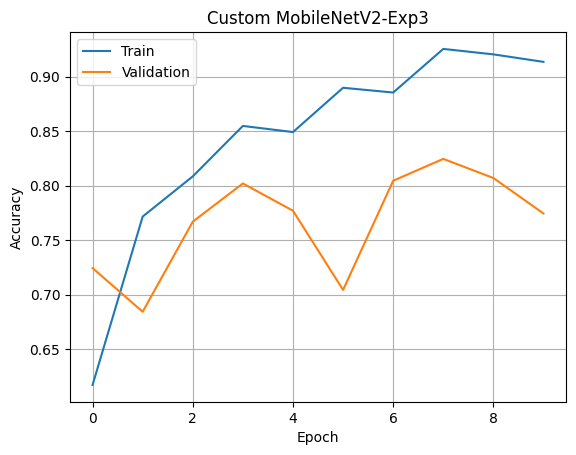

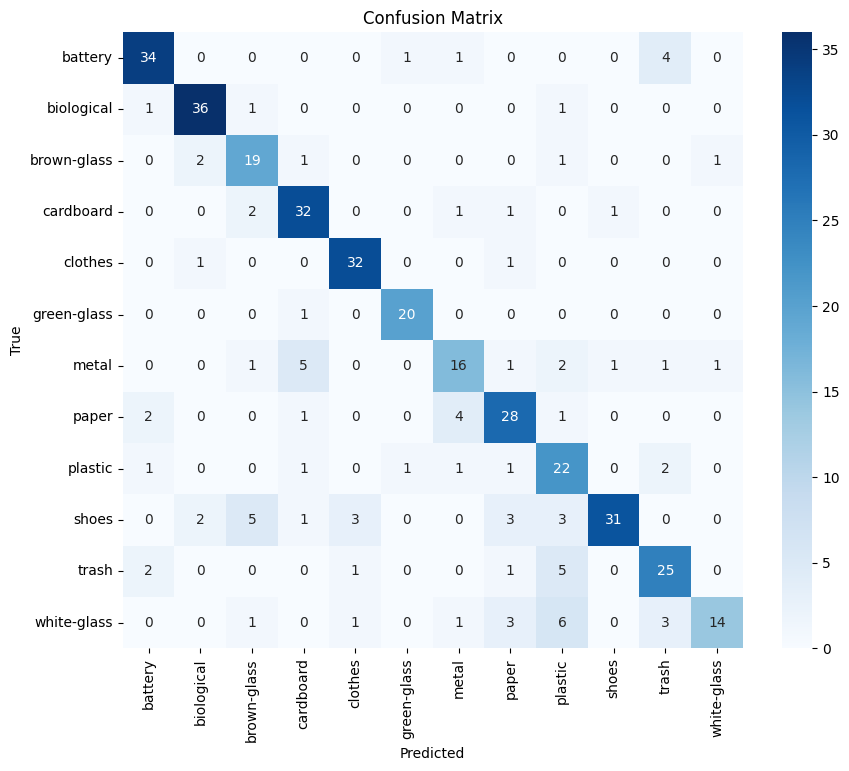

Classification Report:
              precision    recall  f1-score   support

     battery     0.8500    0.8500    0.8500        40
  biological     0.8780    0.9231    0.9000        39
 brown-glass     0.6552    0.7917    0.7170        24
   cardboard     0.7619    0.8649    0.8101        37
     clothes     0.8649    0.9412    0.9014        34
 green-glass     0.9091    0.9524    0.9302        21
       metal     0.6667    0.5714    0.6154        28
       paper     0.7179    0.7778    0.7467        36
     plastic     0.5366    0.7586    0.6286        29
       shoes     0.9394    0.6458    0.7654        48
       trash     0.7143    0.7353    0.7246        34
 white-glass     0.8750    0.4828    0.6222        29

    accuracy                         0.7744       399
   macro avg     0.7807    0.7746    0.7676       399
weighted avg     0.7907    0.7744    0.7725       399

Accuracy: 0.7744


RuntimeError: Parent directory results/checkpoints does not exist.

In [9]:
# Exp.3.5 - Transfer Learning Fine-tuning (full) - Small dataset -(2m)

import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

# 1. Define model (pretrained + custom head)
class CustomMobileNetV2_exp3(nn.Module):
    def __init__(self, num_classes=12):
        super().__init__()
        base = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        self.features = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)

        # FC layer: 1280 -> 256 -> 12
        # Dropout(0.2,0.3)
        # Activation Function(ReLU6 -> GELU)
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, 256),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. utilize boundary of fine-tuning
def set_finetune_mode(model: CustomMobileNetV2_exp3, mode="partial", unfreeze_last_blocks=2):
    """
    mode: 'freeze' | 'partial' | 'full'
    - freeze  : Freeze the entire backbone (use as feature extractor, train head only)
    - partial : Train only the last N blocks of the backbone
    - full    : Train the entire backbone
    """
    for p in model.features.parameters():
        p.requires_grad = False

    if mode == "full":
        for p in model.features.parameters():
            p.requires_grad = True
    elif mode == "partial":
        blocks = list(model.features.children())
        for m in blocks[-unfreeze_last_blocks:]:
            for p in m.parameters():
                p.requires_grad = True
    elif mode == "freeze":
        pass
    else:
        raise ValueError("mode should be one of {'freeze','partial','full'}")

# 3. load data
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4. load model
model = CustomMobileNetV2_exp3(num_classes=12).to(device)

# 5. select fine-tuning mode
finetune_mode = "full"                # Train the entire backbone
set_finetune_mode(model, mode=finetune_mode, unfreeze_last_blocks=2)

# 6. Training
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

# 7. Accuracy Plot
plot_accuracy(train_acc, val_acc, title="Custom MobileNetV2-Exp3")

# 8. Confusion Matrix
plot_confusion_matrix(model, val_loader, class_names, device=device)

# 9. Precision / Recall / F1-score
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

# 10. Save
torch.save(model.state_dict(), "results/checkpoints/custommobilenetv2_exp3_small_epoch10.pth")

Epoch [1/10] Train Acc: 63.20%, Val Acc: 81.70%
Epoch [2/10] Train Acc: 84.86%, Val Acc: 84.46%
Epoch [3/10] Train Acc: 88.92%, Val Acc: 86.72%
Epoch [4/10] Train Acc: 90.43%, Val Acc: 84.71%
Epoch [5/10] Train Acc: 91.93%, Val Acc: 88.47%
Epoch [6/10] Train Acc: 92.37%, Val Acc: 85.71%
Epoch [7/10] Train Acc: 93.30%, Val Acc: 85.96%
Epoch [8/10] Train Acc: 92.12%, Val Acc: 85.96%
Epoch [9/10] Train Acc: 93.87%, Val Acc: 88.47%
Epoch [10/10] Train Acc: 94.43%, Val Acc: 88.22%


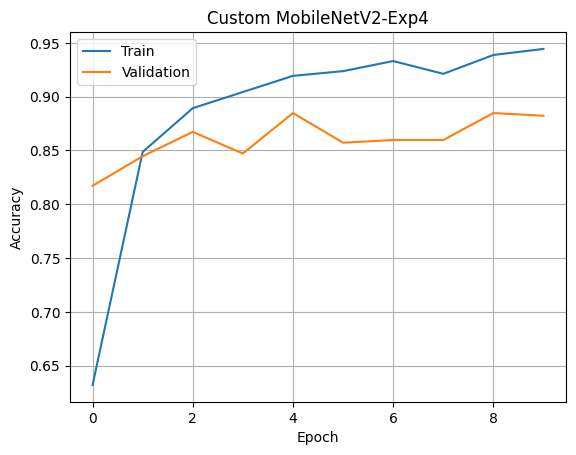

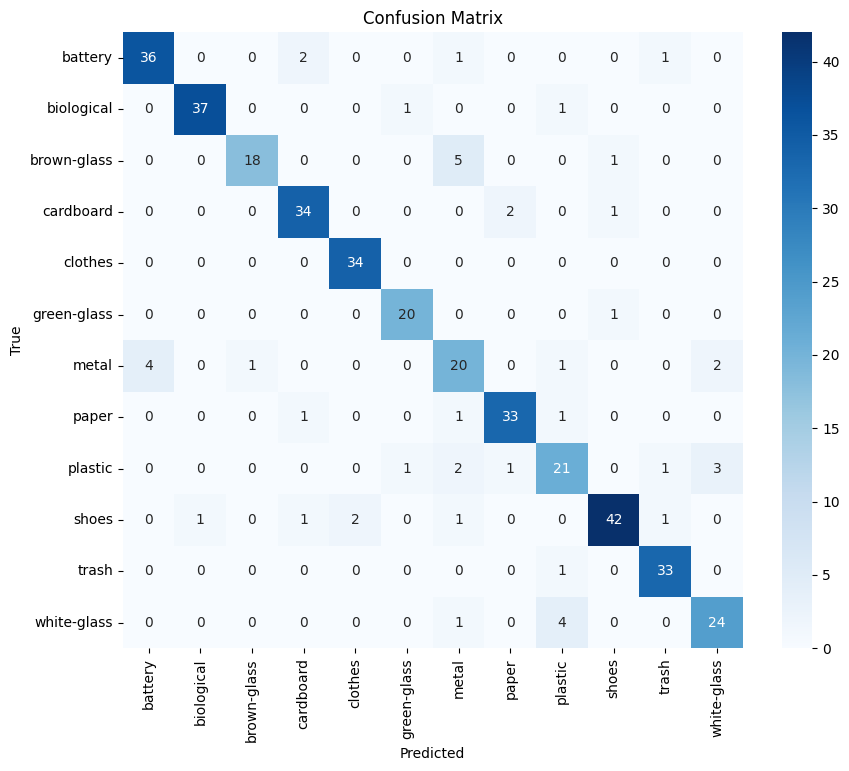

Classification Report:
              precision    recall  f1-score   support

     battery     0.9000    0.9000    0.9000        40
  biological     0.9737    0.9487    0.9610        39
 brown-glass     0.9474    0.7500    0.8372        24
   cardboard     0.8947    0.9189    0.9067        37
     clothes     0.9444    1.0000    0.9714        34
 green-glass     0.9091    0.9524    0.9302        21
       metal     0.6452    0.7143    0.6780        28
       paper     0.9167    0.9167    0.9167        36
     plastic     0.7241    0.7241    0.7241        29
       shoes     0.9333    0.8750    0.9032        48
       trash     0.9167    0.9706    0.9429        34
 white-glass     0.8276    0.8276    0.8276        29

    accuracy                         0.8822       399
   macro avg     0.8777    0.8749    0.8749       399
weighted avg     0.8848    0.8822    0.8824       399

Accuracy: 0.8822


RuntimeError: Parent directory results/checkpoints does not exist.

In [10]:
# Exp.4.5 - Transfer Learning Fine-tuning (freeze) - Small dataset

import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

# 1. Define model (pretrained + custom head)
class CustomMobileNetV2_exp4(nn.Module):
    def __init__(self, num_classes=12):
        super().__init__()
        base = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        self.features = base.features
        self.pool = nn.AdaptiveAvgPool2d(1)

        # FC layer: 1280 -> 256 -> 12
        # Dropout(0.2,0.3)
        # Activation Function(ReLU6 -> GELU)
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, 256),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. utilize boundary of fine-tuning
def set_finetune_mode(model: CustomMobileNetV2_exp4, mode="partial", unfreeze_last_blocks=2):
    """
    mode: 'freeze' | 'partial' | 'full'
    - freeze  : Freeze the entire backbone (use as feature extractor, train head only)
    - partial : Train only the last N blocks of the backbone
    - full    : Train the entire backbone
    """
    for p in model.features.parameters():
        p.requires_grad = False

    if mode == "full":
        for p in model.features.parameters():
            p.requires_grad = True
    elif mode == "partial":
        blocks = list(model.features.children())
        for m in blocks[-unfreeze_last_blocks:]:
            for p in m.parameters():
                p.requires_grad = True
    elif mode == "freeze":
        pass
    else:
        raise ValueError("mode should be one of {'freeze','partial','full'}")

# 3. load data
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4. load model
model = CustomMobileNetV2_exp4(num_classes=12).to(device)

# 5. select fine-tuning mode
finetune_mode = "freeze"                # Freeze the entire backbone (use as feature extractor, train head only)
set_finetune_mode(model, mode=finetune_mode, unfreeze_last_blocks=2)

# 6. Training
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

# 7. Accuracy Plot
plot_accuracy(train_acc, val_acc, title="Custom MobileNetV2-Exp4")

# 8. Confusion Matrix
plot_confusion_matrix(model, val_loader, class_names, device=device)

# 9. Precision / Recall / F1-score
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

# 10. Save
torch.save(model.state_dict(), "results/checkpoints/custommobilenetv2_exp4_small_epoch10.pth")